In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df = df.rename(columns={'3.159499363321345566e-02': 'X', '9.869877579082642072e-01' : 'Y', '0.000000000000000000e+00': 'class'})

In [4]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


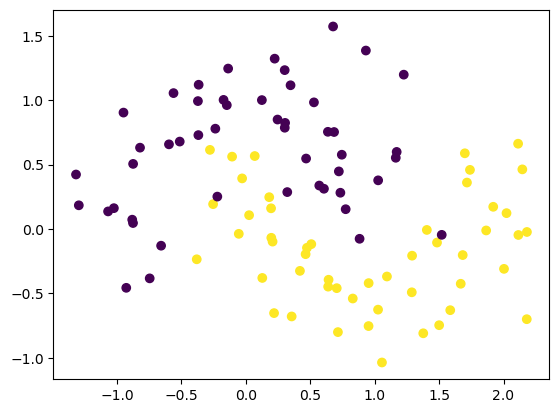

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\skjha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 0.4395557 , -0.49985218, -0.6675801 ,  0.6444625 , -0.2125875 ,
         -0.39452654, -0.19688022,  0.22583258,  0.2941354 , -0.49667448],
        [ 0.39226824,  0.48328775, -0.25604632, -0.17595667, -0.5299467 ,
         -0.16209018,  0.6021623 ,  0.65098387, -0.6958773 ,  0.51107424]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.03198642,  0.13476253, -0.2777003 ,  0.4367224 , -0.45169225,
          0.13384175, -0.2506019 , -0.31714743,  0.45067328,  0.39866078],
        [-0.5439545 ,  0.2732337 , -0.35323638,  0.05464125,  0.33865815,
          0.44389933, -0.22363979, -0.2871988 ,  0.46378732,  0.21284676],
        [ 0.13223052, -0.418351  ,  0.22616106, -0.17290848, -0.47506762,
         -0.44659007, -0.08452925,  0.23056245,  0.24421966,  0.40340632],
        [ 0.21858251,  0.21154064,  0.04224455,  0.35680145,  0.24209112,
         -0.07029042, -0.18080601,  0.2892558 ,  0.38585997,  0.5060853 ],
        [-0.13830

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)
# as in first layer there are two inputs so np.sprt(1/2)  after that there are 10 input. so ......

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[ 0.68582046, -0.03594652,  0.29089162, -0.84152627,  1.0974768 ,
          0.7233051 , -0.13333324, -0.29883772,  0.7312185 ,  0.04770077],
        [-0.56681156,  0.18019532, -0.8591638 ,  1.8574013 , -0.65812606,
         -0.09647089,  0.30311197,  0.2697698 ,  0.31258595,  0.62813383]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.05376584, -0.08402938, -0.6876609 , -0.6921179 ,  0.09246404,
          0.53903985,  0.16022825, -0.14616285,  0.16259387, -0.5177779 ],
        [-0.4102142 , -0.28841257,  0.32463595,  0.6781104 ,  0.36118746,
         -0.56765795,  0.06949577,  0.51262903, -0.710382  , -0.07644212],
        [-0.42357752, -0.33626193,  0.13879254, -0.24771866,  0.3977347 ,
         -0.08760554, -0.29811952, -0.24772358, -0.20878093, -0.39963335],
        [-0.06108026,  0.301965  , -0.29785022, -0.01367322, -0.48880643,
         -0.00912024, -0.38249326,  0.04352618, -0.28419864, -0.05247001],
        [ 0.15908

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.3461 - loss: 0.7199 - val_accuracy: 0.7500 - val_loss: 0.6848
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5207 - loss: 0.6998 - val_accuracy: 0.8000 - val_loss: 0.6607
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6470 - loss: 0.6790 - val_accuracy: 0.8500 - val_loss: 0.6380
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6831 - loss: 0.6589 - val_accuracy: 0.8500 - val_loss: 0.6166
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6762 - loss: 0.6465 - val_accuracy: 0.8500 - val_loss: 0.5971
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7060 - loss: 0.6301 - val_accuracy: 0.8500 - val_loss: 0.5784
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6874 - loss: 0.6289 - val_accuracy: 0.8500 - val_loss: 0.5611
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7538 - loss: 0.5974 - val_accuracy: 0.8500 - val_loss:

In [16]:
model.get_weights()

[array([[ 0.562717  ,  0.00207816,  0.34440595, -0.7818697 ,  1.0385283 ,
          0.852869  , -0.12531066, -0.31504932,  0.67553604, -0.03378291],
        [-0.6839612 ,  0.3088202 , -0.9038444 ,  1.8586508 , -0.7961314 ,
         -0.01683147,  0.38848668,  0.39790946,  0.23737885,  0.6866106 ]],
       dtype=float32),
 array([-0.06074245, -0.01793828, -0.01489738,  0.0596583 , -0.03900528,
        -0.0540502 ,  0.04425263, -0.02693405,  0.0550746 , -0.08830999],
       dtype=float32),
 array([[-0.02080127, -0.03822783, -0.7337657 , -0.65803033,  0.107498  ,
          0.5546338 ,  0.24304871, -0.20105265,  0.16790384, -0.58827645],
        [-0.31456393, -0.38937   ,  0.398578  ,  0.6716806 ,  0.33958048,
         -0.6601052 ,  0.02367553,  0.5572201 , -0.83715075,  0.00582114],
        [-0.5189893 , -0.25747168,  0.07143085, -0.22939545,  0.4343661 ,
         -0.00565628, -0.20515826, -0.28674927, -0.10989121, -0.48303944],
        [ 0.02458326,  0.23452482, -0.23529088, -0.03834551, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 452us/step


<Axes: >

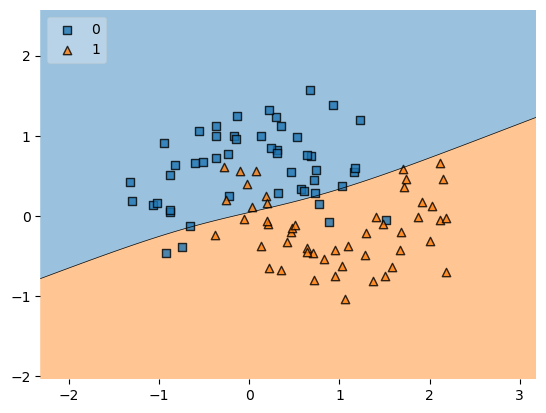

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)